# Capstone: Leveraging NLP for Improved Movie Rating Predictions

Part 3

Author: Michael Rong

Date: April 3rd, 2023

1. Introduction to the Notebook   

2. Modeling Approach

3. Base Model

4. Advanced Modeling and Evaluation

    a. Ridge Regression
    
    b. Random Forest
    

5. Notebook Conclusion

6. Final Conclusion and Next steps

# Introduction to the Notebook

This notebook will mainly focus on the modeling and evaluation of the data that we have went through the process of cleaning and vectorizing, we will talk briefly about how we will approach our modeling portion, showcase various machine learning models. In addition to the modeling and evaluation of the project, next steps will be included to mention what else can be done to improve the project.

# Modeling Approach

The way this notebook will approach modeling is as follows:

First, we will perform a simple linear regression on our base model which is the one that contains only the movie dataset, and not the reviews.

We will then use the our working dataset containing all features from the first dataset as well as the vectorized words to prove that the words do create an improvement in accuracy. Models will be evaluating on 3 things, the accuracy, or r squared score depending on the type of model, the Root Mean Square Error, and the Mean Absolute Error, these will all be explained in a later section of the notebook.

# Base Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV

from sklearn import svm
from sklearn.ensemble import RandomForestRegressor

from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_colwidth',100000000)

We will first evaluate our pre-NLP dataset by using a linear regression model to obtain the accuracy the baseline accuracy which we want to beat. To do so, we will need to go over the processes of structuring the data and creating a train, validation test split for evaluation.

In [2]:
# reading in the data

pre_nlp_df = pd.read_csv(r'C:\Users\micha\OneDrive\Desktop\Capstone\Processed_data\lin_reg_movies.csv')

In [3]:
# Looking at the first couple entries
pre_nlp_df.head()

,avgRating,item_id,Year,Sentiment,#Movies_directed,actor_count,Celeb_score
0,7.78,1,1995,1,6,5,13.20
1,6.53,2,1995,1,9,4,13.00
2,6.34,3,1995,1,11,4,20.00
3,5.74,4,1995,0,4,4,8.25
4,6.15,5,1995,1,7,5,15.00


In [4]:
# Getting the shape

pre_nlp_df.shape

(63769, 7)

We see that the shape is much larger than the 45 thousand entries we had on our working dataset. We will filter out the entries in our pre-NLP dataset which are not present in our working dataset by comparing the two.

In [5]:
# load the completed dataset with movie features and the pre nlp model combined

movieratings_review_df = pd.read_csv(r'C:\Users\micha\OneDrive\Desktop\Capstone\Processed_data\ratingsandreviews.csv')

In [6]:
# Checking shape
movieratings_review_df.shape

(44620, 8)

In [7]:
movieratings_review_df.head()

avgRating  item_id  Year  Sentiment  #Movies_directed  actor_count  \
0       7.78        1  1995          1                 6            5   
1       6.53        2  1995          1                 9            4   
2       6.34        3  1995          1                11            4   
3       5.74        4  1995          0                 4            4   
4       6.15        5  1995          1                 7            5   

   Celeb_score  \
0        13.20   
1        13.00   
2        20.00   
3         8.25   
4        15.00   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [8]:
# expected size of pre_nlp_df after filtering is (44620, 7)

# Filter out rows from the big dataframe that are not present in the small dataframe
filtered_df = pre_nlp_df[pre_nlp_df['item_id'].isin(movieratings_review_df['item_id'])]

In [9]:
# Confirming shape
filtered_df.shape

(44620, 7)

In [10]:
# Drop item id

filtered_df.drop(columns = ['item_id'], inplace = True)

In [11]:
# Confirming drop
filtered_df.head()

,avgRating,Year,Sentiment,#Movies_directed,actor_count,Celeb_score
0,7.78,1995,1,6,5,13.20
1,6.53,1995,1,9,4,13.00
2,6.34,1995,1,11,4,20.00
3,5.74,1995,0,4,4,8.25
4,6.15,1995,1,7,5,15.00


Now, we can perform the same train, validation, and test split as what we had done in the previous notebook. 

In [12]:
# creating rem/test split

# instantiating our independent and dependent variables 
X = filtered_df.drop(columns='avgRating')
y = filtered_df['avgRating']

print(X.shape, y.shape)

(44620, 5) (44620,)


In [13]:
# performing a rem_test_split to better evaluate our model

# error showing up, ask about this
X_rem_base, X_test_base, y_rem_base, y_test_base = train_test_split(X,
                                                y,
                                                test_size=0.3,
                                                random_state= 66)

# Checking the shape of the X compared to y
print(X_rem_base.shape, X_test_base.shape, y_rem_base.shape, y_test_base.shape)

(31234, 5) (13386, 5) (31234,) (13386,)


In [14]:
# Split the remainder set into train and validation sets
X_train_base, X_val_base, y_train_base, y_val_base = train_test_split(X_rem_base,
                                                  y_rem_base,
                                                  test_size=0.2, 
                                                  random_state= 66)

# Checking the shape of the X compared to y
print(X_train_base.shape, X_val_base.shape, y_train_base.shape, y_val_base.shape)

(24987, 5) (6247, 5) (24987,) (6247,)


For our base model, as previously mentioned we will only be performing a linear regression after scaling the data.

In [15]:
# MinMaxScale the data

scaler = MinMaxScaler()
scaler.fit(X_train_base)

# Need this for the evaluation of the model
X_rem_base_mm = scaler.transform(X_rem_base)
X_train_base_mm = scaler.transform(X_train_base)
X_val_base_mm = scaler.transform(X_val_base)
X_test_base_mm = scaler.transform(X_test_base)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Instantiate Linear model
linearregression = LinearRegression()

# Fit the model on the scaled data
linearregression.fit(X_train_base_mm, y_train_base)

# Predict on validation set
prediction = linearregression.predict(X_val_base_mm)

# Get the R squared score for train and validation
Train_r2 = r2_score(y_train_base, linearregression.predict(X_train_base_mm))

Validation_r2 = r2_score(y_val_base, prediction)

print("The Train R2 score:", Train_r2)

print("The Validation R2 score:", Validation_r2)

The Train R2 score: 0.5986349955924455
The Validation R2 score: 0.5948135033209554


The Train and Validation R squared value seem to both score around 0.01 which means that very little can be explained currently through our X variables, remember that the R squared values range from 0 to 1, there is a lot of ground to cover in the advanced models.

### Advanced Modeling and Evaluation

Before we move on to the Advanced modeling section, we should give some context to the metrics we will be evaluating for.

The three metrics are R Squared, Mean Absolute Error, and Root Mean Squared Error,

R squared:The R squared value is a measure of how much of the total variance in our dependent variable was explained by our model. 
In most cases, it will equal a value ranging from 0 to a maximum of 1, however in some cases it will equal a negative number. 
A value of 1 means that all of the variation in our target variable (the average rating) is explained with the model, a value of 0 means that no variance in our target is explained by the model. 

Mean Absolute Error (MAE): MAE is a measure of the difference between predicted and actual values in a model. It is the average of differences between predicted and actual values.

Root Mean Squared Error (RMSE): RMSE is quite similar to MAE as it is also a measure of the difference between predicted and actual values in a model. The difference between that two is that RMSE is the square root of the squared average between predicted and actual values. This change in the formula makes it so that RMSE places greater importance on errors or predicted values that are further away from the actual values. For both MAE and RMSE, a higher number represents higher error, while a lower number is regarded as better.

For our advanced models, we will be running the the entire dataset containing both movie information as well as the vectorized words through a:

1. Ridge Regression

2. Random Forest Regression

We will also be discussing other solutions and methods of assessment later in the notebook.

Let's start with the ridge regression, we will be following a very similar process to the one from our previous notebook, using all the data given and not just the vectorized words.

In [17]:
# Reading in the CSV files from before

train_df = pd.read_csv(r'C:\Users\micha\OneDrive\Desktop\Capstone\Processed_data\train_df.csv')

In [18]:
# Reading in the validation CSV file

val_df = pd.read_csv(r'C:\Users\micha\OneDrive\Desktop\Capstone\Processed_data\val_df.csv')

In [19]:
# Reading in the validation CSV file
test_df = pd.read_csv(r'C:\Users\micha\OneDrive\Desktop\Capstone\Processed_data\val_df.csv')

In [20]:
# checking shapes
print(train_df.shape)

print(val_df.shape)

print(test_df.shape)

(24987, 2739)
(6247, 2739)
(6247, 2739)


In [21]:
# Dropping review_texts as it does not give any more information

# Also dropping the sentiment column

train_df.drop(columns = ['review_texts'], inplace = True)

val_df.drop(columns = ['review_texts'], inplace = True)

test_df.drop(columns = ['review_texts'], inplace = True)

In [22]:
# Checking structure of the data
train_df.head()

,Year,Sentiment,#Movies_directed,actor_count,Celeb_score,abandon,abil,abl,absolut,absorb,...,young man,young woman,younger,your,youth,youv,youv seen,zero,,avgRating
0,1985,0,4,4,14.75,0.0,0.014638,0.000000,0.010462,0.0,...,0.0,0.019735,0.0000,0.020693,0.000000,0.014308,0.0,0.000000,0.000000,5.98
1,1999,1,24,5,14.60,0.0,0.012446,0.000000,0.017790,0.0,...,0.0,0.000000,0.0000,0.008797,0.014759,0.012165,0.0,0.017636,0.057743,7.45
2,1973,0,5,4,5.50,0.0,0.020959,0.007708,0.000000,0.0,...,0.0,0.028257,0.0000,0.007407,0.000000,0.000000,0.0,0.000000,0.029173,4.37
3,1982,1,11,2,3.50,0.0,0.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.0000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,7.00
4,1996,1,2,1,20.00,0.0,0.000000,0.015218,0.000000,0.0,...,0.0,0.000000,0.0217,0.000000,0.000000,0.000000,0.0,0.000000,0.076791,6.16


After loading the data, we can see that the data is still split properly, as well as in the proper structure that we need. We will be creating a remainder set from the train and validation set, as some of our models will require that they be combined for hyperparameter optimization, in this case we will train our data on the remainder set and evaluate on the test set. If not, we will be using the train and validation set to test our models.

In [23]:
# need to join test and val sets for models where we will be using 5 fold cross validation

rem_df = pd.concat([train_df.reset_index(drop = True), val_df.reset_index(drop = True)], axis=0)
print(rem_df.shape)

(31234, 2738)


In [24]:
# from each set, we will need to seperate the features from the target variable again.

# remember these are already all train, validation, remainder, or test splits

# not scaled, will scale based on type of model

# instantiating our independent and dependent variables 
X_train = train_df.drop(columns='avgRating')
y_train = train_df['avgRating']


X_val = val_df.drop(columns='avgRating')
y_val = val_df['avgRating']


X_rem = rem_df.drop(columns='avgRating')
y_rem = rem_df['avgRating']


X_test = test_df.drop(columns='avgRating')
y_test = test_df['avgRating']

## Ridge Regression

First we will need to scale the data, we will do so using MinMax scaling since the word features are already on a scale of 1 to 0, and the data does not have many outliers after the data processing. We will only need to scale the remainder and test set as those are the two which we will be training and evaluating on.

After that, we will optimize the hyperparameter 'alpha' for our ridge regression using a 5 fold cross validation, this will be done on the remainder set, performing a randomized search to find the best alpha.

In [25]:
# Scaling the data for our remainder and test set first

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the remainder set
X_rem_MM = scaler.fit_transform(X_rem)

# Transform the test set
X_test_MM = scaler.transform(X_test)

In [26]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# produce randomized search to find good alpha value
# no need to scale results from tfidf since you are only including the data from the reviews

# Define the distribution of alpha to do a random search
alpha_distribution = {'alpha': np.random.uniform(low=0, high=10, size=100)}

# Initialize the Ridge model
ridgeregression = Ridge()

search = RandomizedSearchCV(ridgeregression, alpha_distribution, cv=5, n_iter=100, random_state= 66)

# Fit the search
search.fit(X_rem_MM, y_rem)

# Print the best alpha value found by the randomized search
print("Best alpha value: ", search.best_params_['alpha'])


Best alpha value:  9.971897981282353


In [27]:
from sklearn.linear_model import Ridge, Lasso

ridge_reg = Ridge(alpha = search.best_params_['alpha'])
ridge_reg.fit(X_rem_MM, y_rem)

# Training and test score
print(f"Train score: {ridge_reg.score(X_rem_MM, y_rem)}")

print(f"Test score: {ridge_reg.score(X_test_MM, y_test)}")


# Predict on test data
ridge_predict = ridge_reg.predict(X_test_MM)

# Mean Absolute Error
mae = mean_absolute_error(y_test, ridge_predict)

print(f"Mean Absolute Error: {mae}")

# Compute Mean Squared Error
mse = mean_squared_error(y_test, ridge_predict)

# Root Mean Squared Error
rmse = np.sqrt(mse)

print(f"Root Mean Square Error: {rmse}")

Train score: 0.6710148313064387
Test score: 0.6655174761919722
Mean Absolute Error: 0.5524340555408311
Root Mean Square Error: 0.7563662977539466


From the results, we see small improvement from the model which did not have words. 

The model now has an train rsquared of 0.62 and a rsquared of 0.61 for the test. Which is under the threshold for overfitting.

The Mean Absolute error and Root Mean squared error are 0.59 and 0.81 respectively. Considering how the ratings is based on a scale of 1 to 10, I would say this is quite good, as we can comfortably get ratings with on average less than 1 point difference. We do see that the root mean square error is higher though, which suggest that some results are further apart.

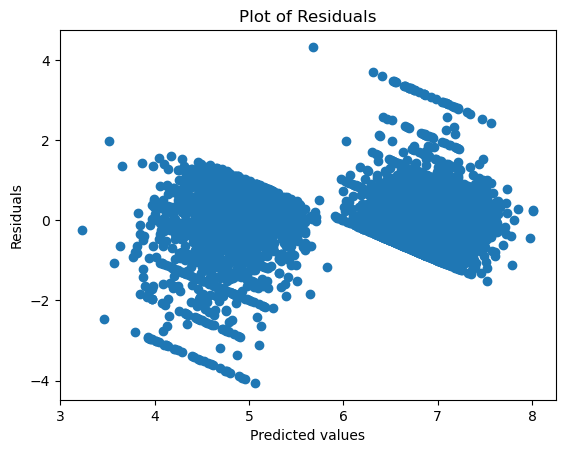

In [28]:
import matplotlib.pyplot as plt

residuals = y_test - ridge_predict

plt.scatter(ridge_predict, residuals)

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Plot of Residuals')
plt.show()

Plotting our residuals allows us to check for Homoscedasticity. Homoecedasticity is the idea that variance of error terms should be random throughout the model. From our plot, we see that this breaks Homoscedasticity as it has a trenddownwards on the upper and lower predicted values. This suggests that this type of data was not suited to be tested with a linear model. Although this was a good starting point nonetheless.

## Random Forest

We will be creating a random forest classifier model, setting a range and step size for number of estimators to test on so we can get higher accuracy using number which gave us the base value.

In [29]:

# Define a range of values for n_estimators to test
n_estimators_range = range(51, 501, 50)

# Train a random forest regressor for each value of n_estimators
# Gets the test error to plot
test_errors = []
for n_estimators in n_estimators_range:
    forest = RandomForestRegressor(n_estimators=n_estimators, random_state=99)
    forest.fit(X_train, y_train)
    forest_pred = forest.predict(X_val)
    test_errors.append(mean_squared_error(y_val, forest_pred))

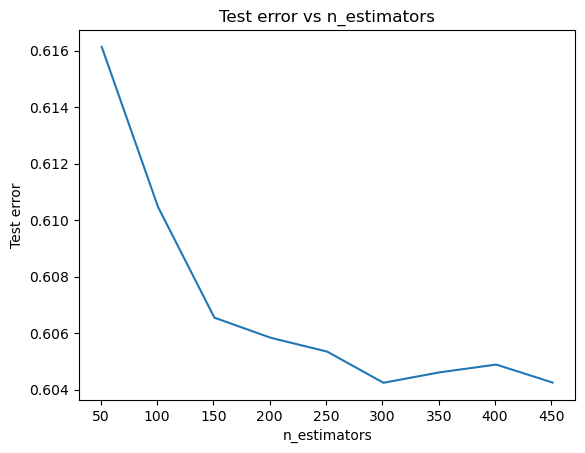

In [30]:
# Plots the test error across the number of estimators
plt.plot(n_estimators_range, test_errors)
plt.xlabel('n_estimators')
plt.ylabel('Test error')
plt.title('Test error vs n_estimators')
plt.show()

In [31]:
# Select the value of n_estimators that gives the highest test accuracy

optimal_n_estimators = n_estimators_range[test_errors.index(min(test_errors))]
print(f"Optimal value of n_estimators: {optimal_n_estimators}")

# Train the random forest, default is 100 but using 10 for time
rfc = RandomForestRegressor(n_estimators= optimal_n_estimators, random_state=99)
rfc.fit(X_train, y_train)

Optimal value of n_estimators: 301


RandomForestRegressor(n_estimators=301, random_state=99)

In [32]:
# Predict on train and test
train_pred = rfc.predict(X_train)
val_pred = rfc.predict(X_val)

# Compute R-squared
train_r_squared = r2_score(y_train, train_pred)
val_r_squared = r2_score(y_val, val_pred)

# Print t
print(f"Train R-squared: {train_r_squared}")
print(f"Validation R-squared: {val_r_squared}")

Train R-squared: 0.9520262906076141
Validation R-squared: 0.646719507430227


In [33]:
# Compute MAE and RMSE on the validation set
val_mae = mean_absolute_error(y_val, val_pred)
val_rmse = mean_squared_error(y_val, val_pred, squared=False)

# Print the evaluation metrics
print(f"MAE: {val_mae}")
print(f"RMSE: {val_rmse}")

MAE: 0.5686573382466107
RMSE: 0.7773297370801217


From our results, The model now has an train rsquared of  and a rsquared of  for the validation. But it seems that it is severely overfitted, we see that there is only a marginal difference in the test errors. The train and validation scores are also near a 40 percent difference with a very high Train score, we will try this model again with a lower n_estimators range to prevent overfitting. 


In [34]:
# Repeat a process, this time from 1 to 51, with a step size of 5

# Define a range of values for n_estimators to test
n_estimators_range = range(1, 51, 5)

# Train a random forest regressor for each value of n_estimators
# Gets the test error to plot
test_errors = []
for n_estimators in n_estimators_range:
    forest = RandomForestRegressor(n_estimators=n_estimators, random_state=99)
    forest.fit(X_train, y_train)
    forest_pred = forest.predict(X_val)
    test_errors.append(mean_squared_error(y_val, forest_pred))

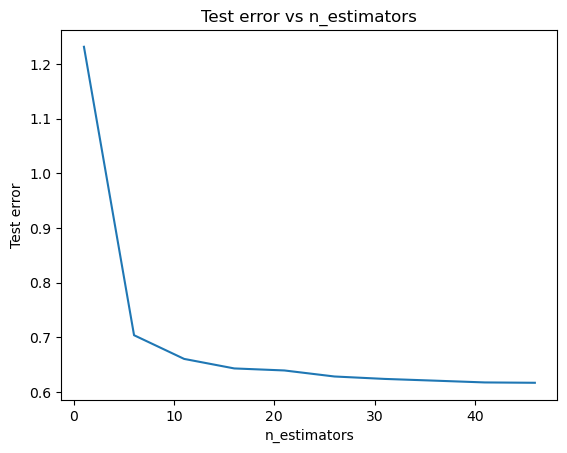

In [35]:
# Plots the test error across the number of estimators
plt.plot(n_estimators_range, test_errors)
plt.xlabel('n_estimators')
plt.ylabel('Test error')
plt.title('Test error vs n_estimators')
plt.show()


In [36]:
# Select the value of n_estimators that gives the highest test accuracy

optimal_n_estimators = n_estimators_range[test_errors.index(min(test_errors))]
print(f"Optimal value of n_estimators: {optimal_n_estimators}")

# Train the random forest, default is 100 but using 10 for time
rfc = RandomForestRegressor(n_estimators= optimal_n_estimators, random_state=99)
rfc.fit(X_train, y_train)

Optimal value of n_estimators: 46


RandomForestRegressor(n_estimators=46, random_state=99)

In [37]:
# Predict on train and test
train_pred = rfc.predict(X_train)
val_pred = rfc.predict(X_val)

# Compute R-squared
train_r_squared = r2_score(y_train, train_pred)
val_r_squared = r2_score(y_val, val_pred)

# Print t
print(f"Train R-squared: {train_r_squared}")
print(f"Validation R-squared: {val_r_squared}")

Train R-squared: 0.9481906779504355
Validation R-squared: 0.6393276435256199


In [38]:
# Compute MAE and RMSE on the validation set
val_mae = mean_absolute_error(y_val, val_pred)
val_rmse = mean_squared_error(y_val, val_pred, squared=False)

# Print the evaluation metrics
print(f"MAE: {val_mae}")
print(f"RMSE: {val_rmse}")

MAE: 0.5767935913586348
RMSE: 0.7854198665503968


# Notebook Conclusion

In this notebook, we had evaluated the data with various statistical and machine learning models. We have obtained results in which we see that there is an improvement when Natural Language Processing is accounted for in the reviews. The results showed approximately 20% increase from the initial model that we had tested on.

# Final Conclusion and Next Steps

In this project, the idea was to improve the predictions of movie ratings by using Natural Language Processing. Based on the results and evaluations of the models that we were able to complete on time. I feel like that has proven successful. 

While reviews and scores are generally subjective, there is a lot of nuance between what one person would rate something they describe as 'Amazing' or 'Terrible', which could explain our somewhat lackluster results on our final models. One of the issues addressed was that in the dataset, the features which were given was not well fit towards a regression model as it did not meet Homoscedasticity.

Regardless of this, some next steps that will be implemented upon the completion of the program are the following:

- Revectorize the words in the review text, this time lowering the sentiment classification to a lower review score, this might produce more accurate negative keywords.

- Incorporate web scraping techniques to add additional features from the IMDB website to movies with corresponding imdb_id's. We would attempt to find features more indicative of positive and negative ratings such as whether the actors or movies were nominated for awards.

- Including more advanced models such as XG boost

- Use clustering techniques to find words that may have similar qualities with methods such as the BERT model.

With that being said, I found that I have learned a lot about the processes in data science through conducting this project. I hope this gave some valuable insight, and thank you for reading through the project.